In [1]:
% matplotlib inline
import matplotlib.pyplot as plt

import image_features_extraction.Images as fe


IMGS_BIN = fe.Images('./CT/bin')

IMGS_SMAD = fe.Images('./CT/smad')

print(IMGS_BIN.file_names())
print(IMGS_SMAD.file_names())

['20170116_t0_ctrl_10_bin.tif', '20170116_t0_ctrl_3_bin.tif', '20170116_t0_ctrl_6_bin.tif', '20170116_t0_ctrl_9_bin.tif']
['20170116_t0_ctrl_10_smad2.tif', '20170116_t0_ctrl_3_smad2.tif', '20170116_t0_ctrl_6_smad2.tif', '20170116_t0_ctrl_9_smad2.tif']


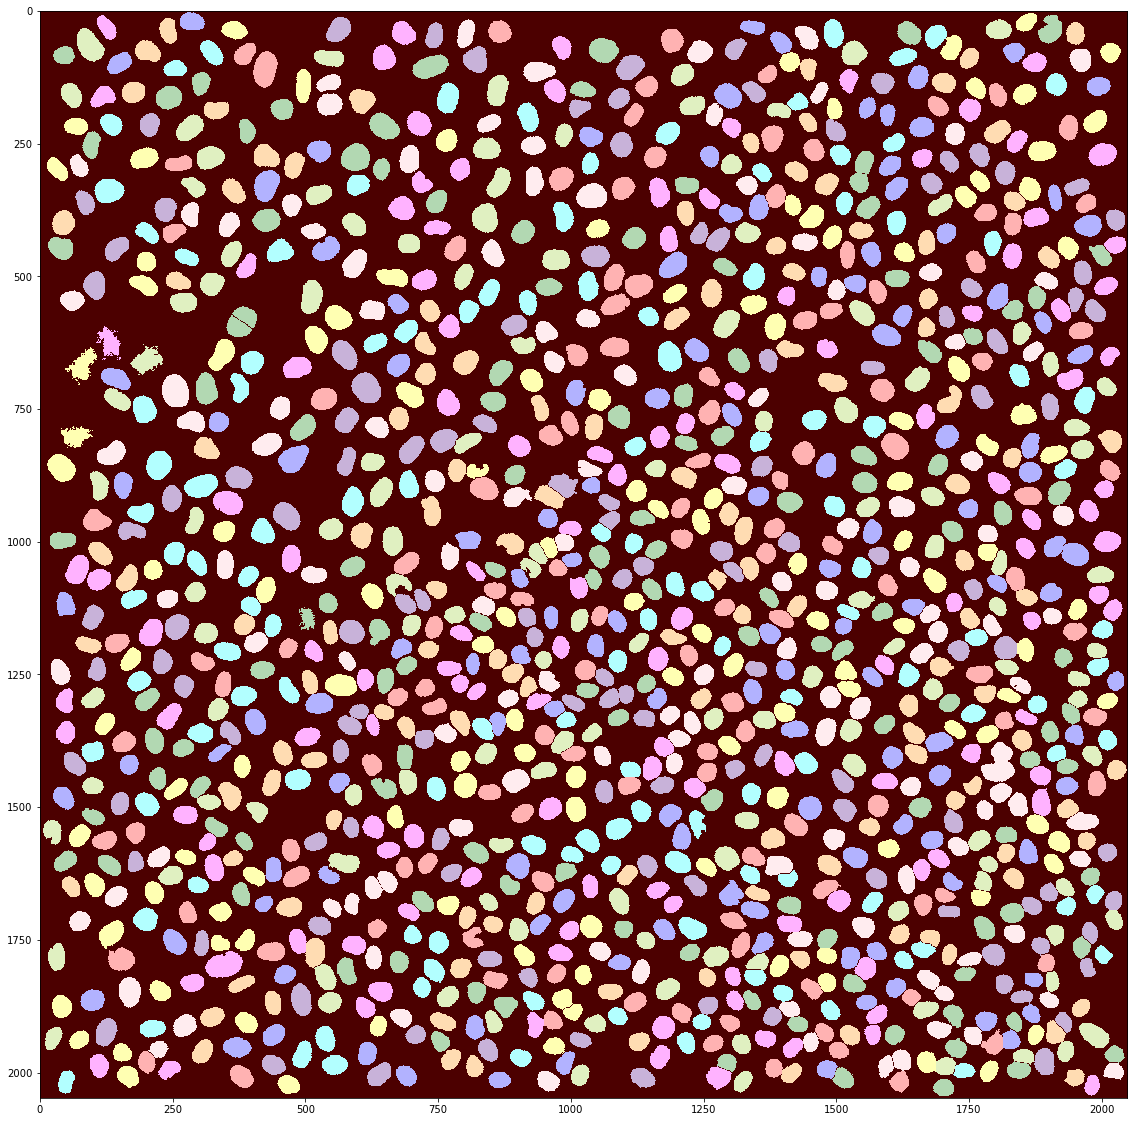

In [2]:
A1 = IMGS_BIN.item(3)

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(A1.get_image_segmentation())

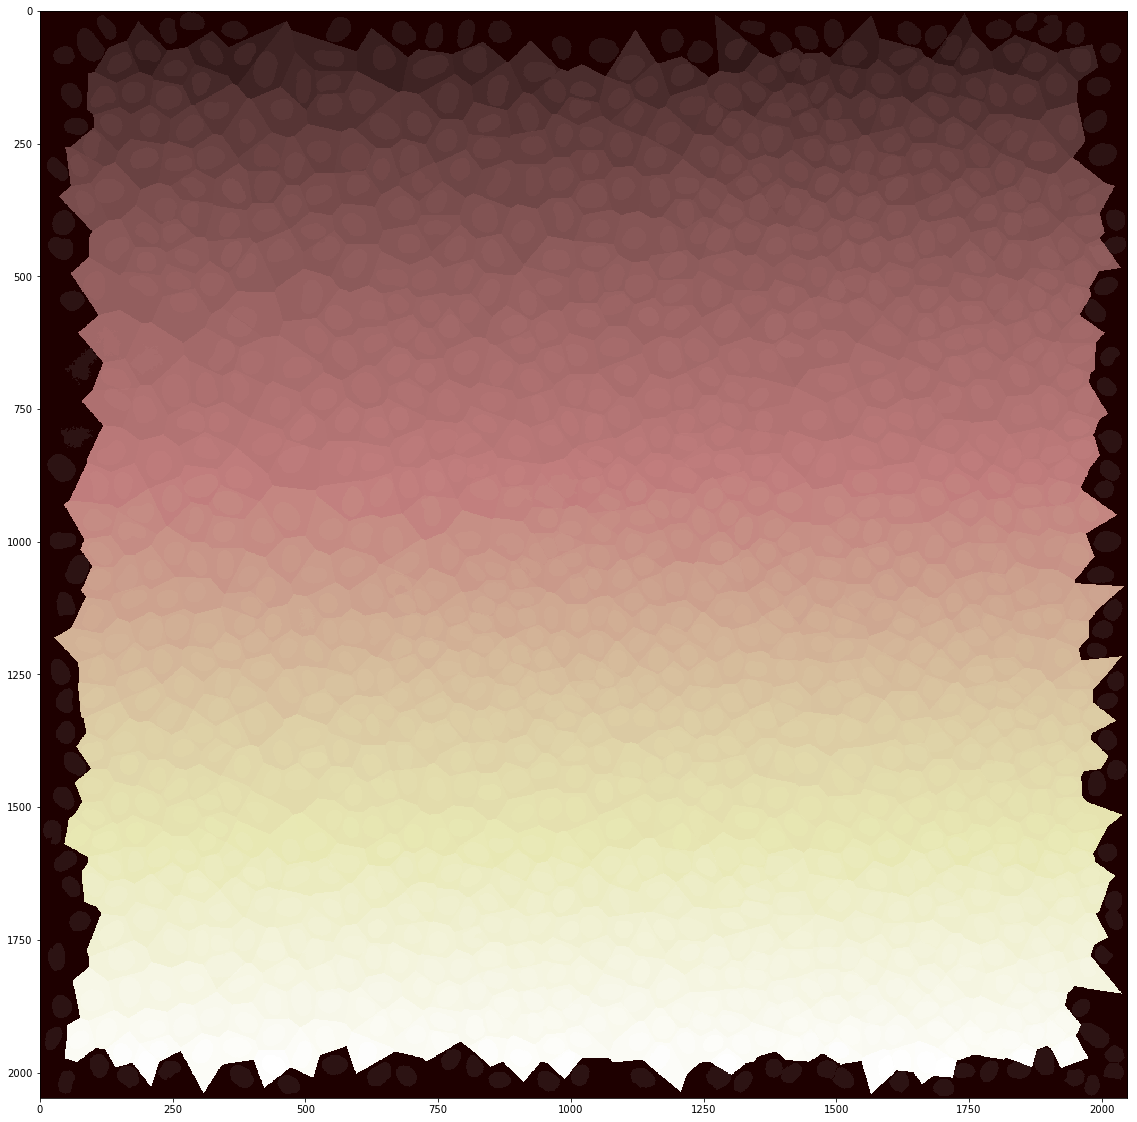

In [3]:
vor = A1.Voronoi()

V1 = vor.get_voronoi_map()

IMG_MIX = V1 + A1.get_image()/17

fig = plt.figure(figsize=(20,20))
plt.imshow(IMG_MIX, cmap=plt.get_cmap('pink'))

In [4]:
A1 = IMGS_BIN.item(3)
B1 = IMGS_SMAD.item(3)

A1.set_image_intensity(B1)

V1 = A1.Voronoi()

In [5]:
V1.get_image_intensity()

array([[13, 14, 13, ..., 21, 22, 23],
       [11, 10, 13, ..., 21, 18, 20],
       [14, 12, 12, ..., 21, 20, 27],
       ..., 
       [15, 12, 12, ..., 14, 17, 13],
       [15, 13, 11, ..., 14, 15, 12],
       [ 9, 12, 14, ..., 13, 14, 12]], dtype=uint8)

In [7]:
FN1 = A1.features(['area','perimeter','centroid','minor_axis_length','major_axis_length', \
                        'eccentricity','extent', 'equivalent_diameter',\
                        'solidity', 'intensity_image','mean_intensity', 'max_intensity', 'min_intensity'], prefix='nucl_')


FV1 = V1.features(['area','perimeter','minor_axis_length','major_axis_length', \
                        'eccentricity','extent', 'equivalent_diameter',\
                        'solidity','intensity_image','mean_intensity', 'max_intensity', 'min_intensity'], prefix='voro_')

F1 = FN1.merge(FV1)


df = F1.get_dataframe()

In = np.array([np.sum(I) for I in df.nucl_intensity_image])
Iv = np.array([np.sum(I) for I in df.voro_intensity_image])

voro_mean_intensity_nonucl = (Iv-In)/(df.voro_area-df.nucl_area)

activity = df.nucl_mean_intensity / voro_mean_intensity_nonucl

F1.add_feature('nucl_smad_activity', activity)

F1.save('./DATA_NUCLSMAD_444.csv')

df = F1.get_dataframe()
df.head()



,id,nucl_area,nucl_perimeter,nucl_centroid,nucl_minor_axis_length,nucl_major_axis_length,nucl_eccentricity,nucl_extent,nucl_equivalent_diameter,nucl_solidity,...,voro_major_axis_length,voro_eccentricity,voro_extent,voro_equivalent_diameter,voro_solidity,voro_intensity_image,voro_mean_intensity,voro_max_intensity,voro_min_intensity,nucl_smad_activity
0,21,1392,153.367532,"(71.3311781609, 1716.08908046)",34.481404,52.348647,0.752417,0.692882,42.099281,0.932976,...,109.093653,0.920240,0.448961,66.344473,0.973803,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",17.912352,35,8,0.820198
1,24,1176,135.438600,"(72.943877551, 1308.3579932)",32.444554,46.921975,0.722417,0.667045,38.695345,0.966311,...,107.044244,0.761207,0.561991,81.680935,0.978890,"[[27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",18.103053,42,6,0.757460
2,25,1527,154.024387,"(77.5540275049, 202.159790439)",38.112754,51.812114,0.677421,0.744878,44.093500,0.962193,...,94.737886,0.775174,0.538394,73.734204,0.977564,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",16.447541,146,7,0.875096
3,26,1411,149.781746,"(80.175761871, 323.228915663)",33.128732,54.326994,0.792553,0.668087,42.385623,0.968428,...,83.516790,0.612693,0.633613,72.664464,0.983167,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",17.128527,50,4,1.019612
4,28,1708,160.438600,"(80.9426229508, 1531.42505855)",45.070019,48.580969,0.373252,0.726809,46.633605,0.967705,...,106.449713,0.747115,0.563100,82.910918,0.982530,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",19.510650,36,9,0.767618


In [106]:
df.head()

,id,nucl_area,nucl_perimeter,nucl_centroid,nucl_minor_axis_length,nucl_major_axis_length,nucl_eccentricity,nucl_extent,nucl_equivalent_diameter,nucl_solidity,...,voro_minor_axis_length,voro_major_axis_length,voro_eccentricity,voro_extent,voro_equivalent_diameter,voro_solidity,voro_intensity_image,voro_mean_intensity,voro_max_intensity,voro_min_intensity
0,21,1392,153.367532,"(71.3311781609, 1716.08908046)",34.481404,52.348647,0.752417,0.692882,42.099281,0.932976,...,42.694225,109.093653,0.920240,0.448961,66.344473,0.973803,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",17.912352,35,8
1,24,1176,135.438600,"(72.943877551, 1308.3579932)",32.444554,46.921975,0.722417,0.667045,38.695345,0.966311,...,69.419098,107.044244,0.761207,0.561991,81.680935,0.978890,"[[27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",18.103053,42,6
2,25,1527,154.024387,"(77.5540275049, 202.159790439)",38.112754,51.812114,0.677421,0.744878,44.093500,0.962193,...,59.850498,94.737886,0.775174,0.538394,73.734204,0.977564,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",16.447541,146,7
3,26,1411,149.781746,"(80.175761871, 323.228915663)",33.128732,54.326994,0.792553,0.668087,42.385623,0.968428,...,66.005087,83.516790,0.612693,0.633613,72.664464,0.983167,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",17.128527,50,4
4,28,1708,160.438600,"(80.9426229508, 1531.42505855)",45.070019,48.580969,0.373252,0.726809,46.633605,0.967705,...,70.756542,106.449713,0.747115,0.563100,82.910918,0.982530,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",19.510650,36,9


## correlation voro area smad activity (mean)

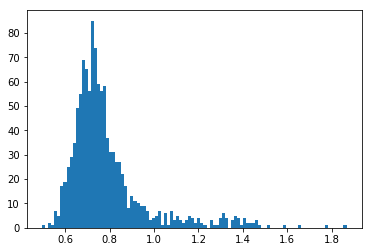

In [8]:

b = plt.hist(df.nucl_smad_activity, 100)

df['activation'] = activation

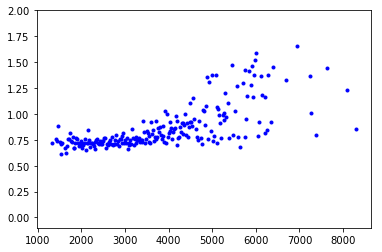

In [9]:
from scipy.stats import binned_statistic

x = df.voro_area
y = df.nucl_smad_activity

s = binned_statistic(x, y, bins=500, range=(0, 10000))
yy = s[0]
xx = s[1]

#plt.xlim([2000,10000])
plt.ylim([-0.1,2])
plt.plot(xx[0:-1],yy, '.b')

## show single voro tassell or nucleus

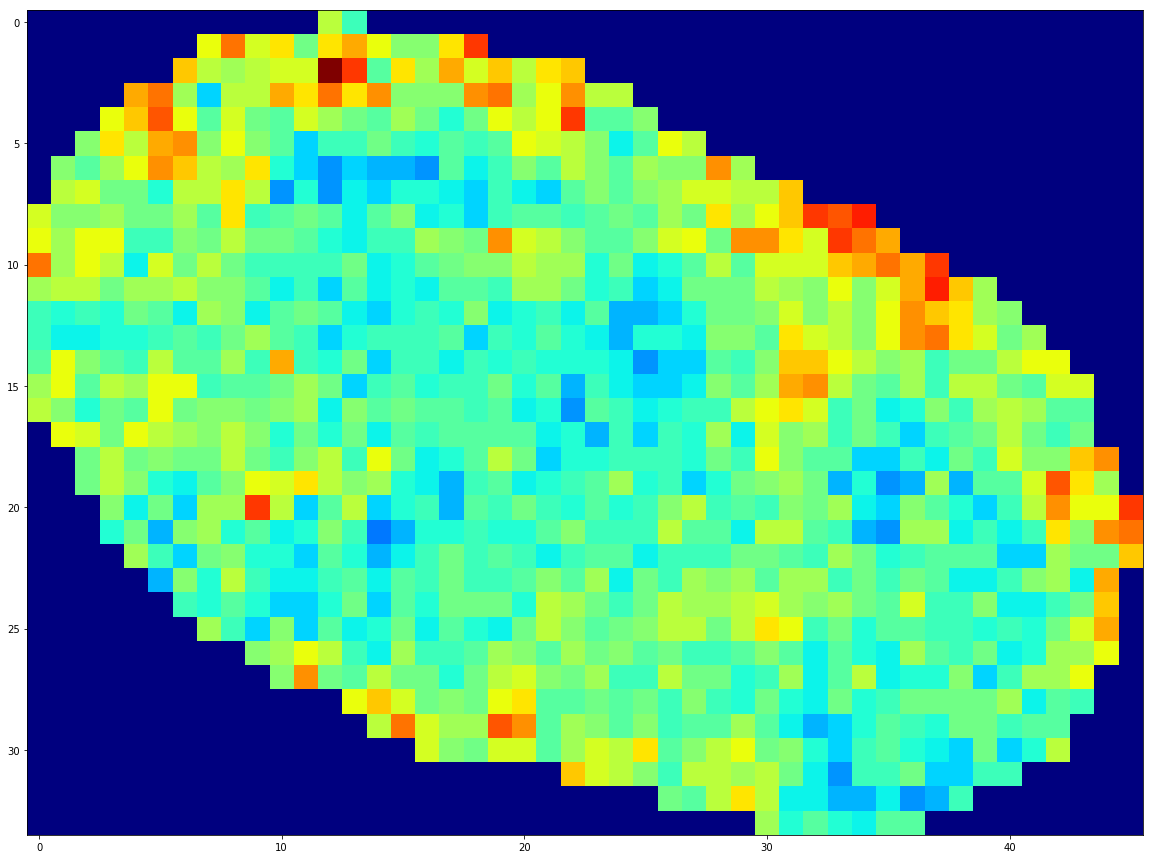

In [111]:
I1 = df.nucl_intensity_image[200]
I2 = df.voro_intensity_image[200]

fig = plt.figure(figsize=(20,20))
plt.imshow(I1, cmap=plt.get_cmap('jet'))

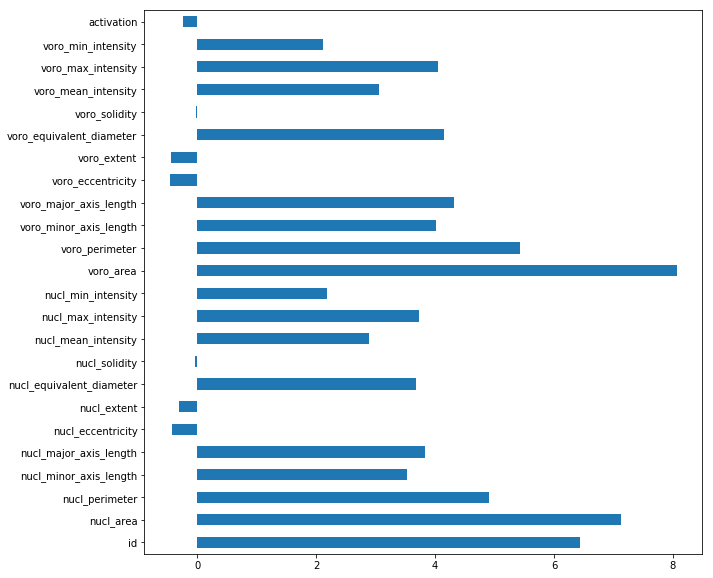

In [113]:
import numpy as np

np.log(df.mean()).plot(kind='barh', figsize=(10,10))

## Build and save a dateset  of featuers from many images

In [ ]:
% matplotlib inline
import matplotlib.pyplot as plt

import image_features_extraction.Images as fe


IMGS_BIN = fe.Images('./CT/bin')

IMGS_SMAD = fe.Images('./CT/smad')

print(IMGS_BIN.file_names())
print(IMGS_SMAD.file_names())

In [10]:
import numpy as np
import pandas as pd

n = IMGS_BIN.count()

for i in range(0,n):
    A1 = IMGS_BIN.item(i)
    B1 = IMGS_SMAD.item(i)

    A1.set_image_intensity(B1)

    V1 = A1.Voronoi()
    
    FN1 = A1.features(['area','perimeter','centroid','minor_axis_length','major_axis_length', \
                        'eccentricity','extent', 'equivalent_diameter',\
                        'solidity', 'intensity_image','mean_intensity', 'max_intensity', 'min_intensity'], prefix='nucl_')


    FV1 = V1.features(['area','perimeter','minor_axis_length','major_axis_length', \
                        'eccentricity','extent', 'equivalent_diameter',\
                        'solidity','intensity_image','mean_intensity', 'max_intensity', 'min_intensity'], prefix='voro_')

    F1 = FN1.merge(FV1)
    
    df = F1.get_dataframe()
    
    In = np.array([np.sum(I) for I in df.nucl_intensity_image])
    Iv = np.array([np.sum(I) for I in df.voro_intensity_image])

    voro_mean_intensity_nonucl = (Iv-In)/(df.voro_area-df.nucl_area)

    activity = df.nucl_mean_intensity / voro_mean_intensity_nonucl
    
    F1.add_feature('nucl_smad_activity', activity)

    F1.save('./DATA_NUCLSMAD_v3.csv')

## Show correlation voro area vs smad activity (mean) 

In [26]:
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

df = pd.read_csv('./DATA_EXP2_v3.csv')

df1 = df[df.key_experiment=='CA']
df2 = df[df.key_experiment=='CT']

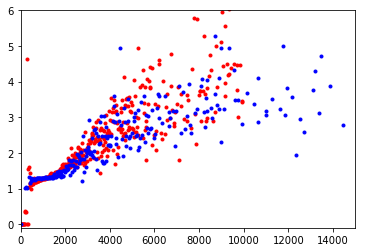

In [33]:
# CA ##################

x = df1.voro_area
y = df1.nucl_smad_activity

s = binned_statistic(x, y, bins=500, range=(0, 10000))
yy = s[0]
xx = s[1]

plt.xlim([0,15000])
plt.ylim([-0.1,6])
plt.plot(xx[0:-1],yy, '.r')


# CT ##################

x = df2.voro_area
y = df2.nucl_smad_activity

s = binned_statistic(x, y, bins=500, range=(0, 15000))
yy = s[0]
xx = s[1]

#plt.xlim([2000,10000])
#plt.ylim([-0.1,2])
plt.plot(xx[0:-1],yy, '.b')

In [24]:
df

,Unnamed: 0,id,nucl_area,nucl_perimeter,nucl_centroid,nucl_minor_axis_length,nucl_major_axis_length,nucl_eccentricity,nucl_extent,nucl_equivalent_diameter,...,voro_extent,voro_equivalent_diameter,voro_solidity,voro_intensity_image,voro_mean_intensity,voro_max_intensity,voro_min_intensity,nucl_smad_activity,key_filename,key_experiment
5997,0,51,310,67.355339,"(18.593548387096774, 3572.5225806451613)",16.049290,24.894640,0.764445,0.679825,19.867165,...,0.548214,27.960134,0.960876,"[[0 0 0 ..., 0 0 0]\n [0 0 0 ..., 0 0 0]\n [0 ...",52.705212,110,29,1.675864e+00,./images/exp2/CT/bin/CT_24_DNA_bin.tif,CT
5998,1,52,433,84.597980,"(23.069284064665126, 3748.6928406466513)",18.329624,31.666707,0.815449,0.656061,23.480049,...,0.538760,29.747294,0.953361,"[[0 0 0 ..., 0 0 0]\n [0 0 0 ..., 0 0 0]\n [0 ...",38.631655,82,22,1.411780e+00,./images/exp2/CT/bin/CT_24_DNA_bin.tif,CT
5999,2,55,410,74.769553,"(22.087804878048779, 1706.939024390244)",19.734391,26.476133,0.666656,0.759259,22.847937,...,0.699700,34.447921,0.969823,"[[0 0 0 ..., 0 0 0]\n [0 0 0 ..., 0 0 0]\n [0 ...",74.273605,227,41,1.457002e+00,./images/exp2/CT/bin/CT_24_DNA_bin.tif,CT
6000,3,56,612,101.597980,"(23.794117647058822, 1114.0849673202615)",23.207372,34.664734,0.742829,0.666667,27.914559,...,0.614583,28.745999,0.960059,"[[0 0 0 ..., 0 0 0]\n [0 0 0 ..., 0 0 0]\n [0 ...",53.147920,91,35,7.107559e-01,./images/exp2/CT/bin/CT_24_DNA_bin.tif,CT
6001,4,57,195,50.870058,"(18.523076923076925, 1679.8)",14.034748,17.771712,0.613462,0.716912,15.756958,...,0.764103,30.798757,0.951469,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,54.994631,125,28,1.491399e+00,./images/exp2/CT/bin/CT_24_DNA_bin.tif,CT
6002,5,60,303,64.284271,"(23.600660066006601, 1055.6831683168316)",18.566899,20.977995,0.465467,0.759398,19.641578,...,0.608333,28.922627,0.960526,"[[0 0 0 ..., 0 0 0]\n [0 0 0 ..., 0 0 0]\n [0 ...",51.722983,74,34,8.975455e-01,./images/exp2/CT/bin/CT_24_DNA_bin.tif,CT
6003,6,61,346,71.355339,"(23.352601156069365, 1006.4306358381502)",17.766457,25.414894,0.715066,0.728421,20.989066,...,0.672386,32.370915,0.955865,"[[0 0 0 ..., 0 0 0]\n [0 0 0 ..., 0 0 0]\n [0 ...",73.396112,125,47,1.023808e+00,./images/exp2/CT/bin/CT_24_DNA_bin.tif,CT
6004,7,62,407,78.219300,"(27.100737100737099, 3663.842751842752)",18.946236,27.566147,0.726373,0.680602,22.764193,...,0.622024,32.625577,0.966474,"[[0 0 0 ..., 0 0 0]\n [0 0 0 ..., 0 0 0]\n [0 ...",50.956938,110,22,1.244758e+00,./images/exp2/CT/bin/CT_24_DNA_bin.tif,CT
6005,8,64,221,54.727922,"(24.41628959276018, 1279.1266968325792)",16.378730,17.501439,0.352397,0.866667,16.774562,...,0.663690,23.829915,0.948936,[[ 0 0 0 0 0 0 0 0 0 78 85 ...,70.365471,104,48,1.095622e+00,./images/exp2/CT/bin/CT_24_DNA_bin.tif,CT
6006,9,65,270,59.698485,"(24.648148148148149, 957.8481481481482)",16.348030,21.057055,0.630280,0.767045,18.541162,...,0.509821,26.963304,0.959664,"[[0 0 0 ..., 0 0 0]\n [0 0 0 ..., 0 0 0]\n [0 ...",64.408056,105,41,1.135311e+00,./images/exp2/CT/bin/CT_24_DNA_bin.tif,CT


In [41]:
# try some clustering to determine what are the features that 

df.columns.values


array(['Unnamed: 0', 'id', 'nucl_area', 'nucl_perimeter', 'nucl_centroid',
       'nucl_minor_axis_length', 'nucl_major_axis_length',
       'nucl_eccentricity', 'nucl_extent', 'nucl_equivalent_diameter',
       'nucl_solidity', 'nucl_intensity_image', 'nucl_mean_intensity',
       'nucl_max_intensity', 'nucl_min_intensity', 'voro_area',
       'voro_perimeter', 'voro_minor_axis_length',
       'voro_major_axis_length', 'voro_eccentricity', 'voro_extent',
       'voro_equivalent_diameter', 'voro_solidity', 'voro_intensity_image',
       'voro_mean_intensity', 'voro_max_intensity', 'voro_min_intensity',
       'nucl_smad_activity', 'key_filename', 'key_experiment'], dtype=object)

In [42]:
n

NameError: name 'n' is not defined